In [1]:
import cv2
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels=[] ##empty lists of python
file_name='labels.txt'
with open(file_name,'rt')as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)## 255/2=127.5
model.setInputMean((127.5,127.5,127.5)) ##mobilenet=>[-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 000001DC0BDDB790>

# read an image

In [9]:
img=cv2.imread('1.jpg')

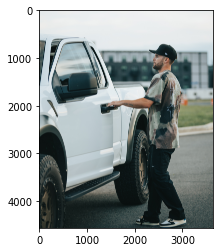

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [12]:
print(ClassIndex)

[1 3 3]


In [13]:
font_scale=10
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    #cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    #cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=10)

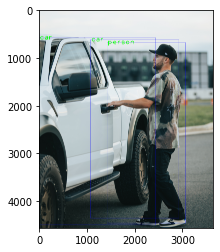

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# video DEmo

In [15]:
cap=cv2.VideoCapture("video1.mp4")

#check if the video is openend correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Video")

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    
    ClassIndex,confidece,bbox=model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

    cv2.imshow('object Detection Tutorial',frame)

    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[6 1 1 1 6 1 1 1]
[6 1 1 1 1 1 6 1 1 1]
[6 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1]
[6 1 1 1 1 1 1]
[1 1 1 6 1 1 1]
[1 1 6 1 1 1 1]
[1 1 1 6 1 1]
[1 1 1 6 1 1 1]
[1 1 6 1 1 1]
[1 6 1 1 1]
[1 6 1 1 1]
[1 6 1 1 1 1 1]
[1 1 6 1 1 1 1]
[1 1 6 1 1 1 1]
[1 6 1]
[6 1 1]
[1 6]
[1 6 1]
[6]
[6]
[6]
[6 1]
[6 6]
[6]
[6]
[6]
[6 1 1]
[6 1]
[6 1 1]
[6 1]
[6 1]
[6 3 1]
[6 3 1 1 3]
[3 6 1]
[3 6 1 3]
[3 6 1]
[3 1]
[3 6 1]
[3 6 1]
[1 3 6]
[6 3 1 1]
[1 6 3]
[1 6 3]
[6 1 3]
[1 6 3 1]
[1 6 3 1]
[1 6 3 1]
[6 1 3 1 3]
[1 3 6 1 3]
[1 3 6]
[3 1 1 6]
[1 1 3 1 1]
[1 1 3 1]
[1 1 1 1]
[1 1 3 1 1 1]
[1 1 1 3 6]
[1 1 1 1 1 1]
[1 1 1 1 1 8]
[1 1 1 1 1 1 3]
[1 1 1 1 1 3 1]
[1 1 1 1 1 1 3 1]
[1 1 1 1 1 1 1 3 1]
[1 1 1 1 1 1 3 1 1 3]
[1 1 1 1 1 3 3 1 8 3 1]
[1 1 1 1 8 1 1 3 3 3 1]
[1 1 1 1 1 1 8 3 6 1 3 3]
[1 1 1 8 1 6 3 1 3 3 1 1]
[1 1 1 1 8 6 1 3 3 3 1 1]
[1 1 1 3 1 8 3

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
